In [3]:
from classes.market_analysis.SP500Analysis import SP500Analysis
from classes.database.SP500Database import SP500Database
from classes.dataframe.EnhancedDataframe import EnhancedDataframe
from classes.tickersdata.GeneralMarketDataFetcher import GeneralMarketDataFetcher
import matplotlib.pyplot as plt
import numpy as np
from config import db_path
from classes.indicators.MiscIndicators import CVI
import numpy as np

In [4]:
sp500_database = SP500Database()
sp500_database.connect_existing_database(db_path=db_path / "sp500.sqlite")

market_analysis = SP500Analysis(sp500_database)

In [5]:
market_analysis = SP500Analysis(sp500_database)
sefi = market_analysis.sefi()
adr = market_analysis.adr_analysis()

historical_data
historical_data


In [6]:
market_analysis.sp500

,High,Low,Open,Close,Volume,Adj Close,Change,SEFI,SEFI Signal,ADR
Date,,,,,,,,,,
2020-09-23,3323.350098,3232.570068,3320.110107,3236.919922,4364500000,3236.919922,NaN,91.633466,True,0.054622
2020-09-24,3278.699951,3209.449951,3226.139893,3246.590088,4599470000,3246.590088,0.298746,90.637450,True,1.535354
2020-09-25,3306.879883,3228.439941,3236.659912,3298.459961,3792220000,3298.459961,1.896418,77.091633,True,7.096774
2020-09-28,3360.739990,3332.909912,3333.899902,3351.600098,3946060000,3351.600098,3.507477,57.968127,False,14.212121
2020-09-29,3357.919922,3327.540039,3350.919922,3335.469971,3651880000,3335.469971,3.026211,62.151394,False,0.390582
...,...,...,...,...,...,...,...,...,...,...
2022-04-26,4278.140137,4175.040039,4278.140137,4175.200195,3760420000,4175.200195,27.404947,85.685885,True,0.058947
2022-04-27,4240.709961,4162.899902,4186.520020,4183.959961,3876340000,4183.959961,27.614752,83.300199,True,1.131356
2022-04-28,4308.450195,4188.629883,4222.580078,4287.500000,3969440000,4287.500000,30.089442,70.974155,False,6.738462


In [5]:
from classes.strategies.TickerStrategy import TickerStrategy

dates = sp500_database.query_all_dates()

latest_date = dates[-1]

df = sp500_database.query_from_date_to_dataframe(latest_date)


historical_data


In [6]:
df['Signal_MA_BOL_RSI'] = np.vectorize(TickerStrategy.ma_bol_rsi_signal)(df['Close'], df['MA50'], df["BB_lower"],
                                                                         df["RSI"])
df["Signal_RSI_STOCH_MACD"] = np.vectorize(TickerStrategy.r_sd_m_signal)(df["RSI"], df["STOCH_D"], df["MACD"])
df["Signal_R_MA20_MA50"] = np.vectorize(TickerStrategy.r_ma20_ma50_signal)(df["RSI"], df["MA20"], df["MA50"])

In [11]:
buys = df[
    (df["Signal_R_MA20_MA50"] == True) & (df["Signal_MA_BOL_RSI"] == True) & (df["Signal_RSI_STOCH_MACD"] == True)]

In [12]:
buys.sort_values("Volume", ascending=False)

,test,Date,Ticker,Open,High,Low,Close,Adjusted_Close,Volume,MA20,...,STOCH_D,BB_lower,BB_middle,BB_upper,MACD,Volume_Change,Change,Signal_MA_BOL_RSI,Signal_RSI_STOCH_MACD,Signal_R_MA20_MA50
71,29160,2022-05-02 00:00:00,BA,148.020004,149.451706,143.382095,143.520004,143.520004,8195219,173.657500,...,8.506374,149.210157,174.214397,199.218637,-3.563151,-0.246784,-3.574303,True,True,True
212,86265,2022-05-02 00:00:00,GE,74.089996,75.820000,72.610001,73.469902,73.469902,7549247,87.069995,...,5.192165,75.597168,87.266832,98.936495,-1.779579,-0.273083,-1.448828,True,True,True
502,203455,2022-05-02 00:00:00,ZTS,176.389999,177.240005,171.553299,171.880005,171.880005,2235457,185.657500,...,8.177062,172.927051,185.951722,198.976393,-1.204360,-0.007258,-3.029616,True,True,True
408,165385,2022-05-02 00:00:00,SPGI,364.000000,371.635010,360.459991,363.529999,363.529999,2152228,393.477498,...,14.808299,366.396073,394.163581,421.931090,-2.828204,0.023360,-3.444887,True,True,True
425,172270,2022-05-02 00:00:00,SWK,119.550003,124.279999,118.949997,119.790001,119.790001,1817942,138.326000,...,4.250422,125.647744,138.749001,151.850257,-1.878983,-0.656376,-0.299626,True,True,True
418,169435,2022-05-02 00:00:00,SPG,118.680000,119.059998,113.719200,113.749001,113.749001,1461347,126.580450,...,9.037844,118.517381,126.971970,135.426559,-1.137879,-0.537534,-3.602542,True,True,True
435,176320,2022-05-02 00:00:00,TROW,124.300003,125.620003,122.220001,122.650002,122.650002,1213808,139.876500,...,4.708006,123.215891,140.397000,157.578108,-2.050493,-0.696556,-0.316970,True,True,True
104,42525,2022-05-02 00:00:00,CHTR,431.489990,435.929993,419.829987,426.334991,426.334991,1037882,523.335748,...,8.534396,440.279106,525.400084,610.521062,-11.494687,-0.784681,-0.502929,True,True,True
429,173890,2022-05-02 00:00:00,SYK,241.699997,243.729996,231.550003,231.550003,231.550003,1023398,259.734502,...,6.335370,239.671726,260.016834,280.361942,-3.420638,-0.668857,-4.024700,True,True,True
470,190495,2022-05-02 00:00:00,VRSN,178.770004,181.009995,174.169998,174.169998,174.169998,867864,210.921000,...,10.081836,187.215359,211.589334,235.963308,-4.159430,-0.625307,-2.529523,True,True,True


In [10]:
market_analysis.sp500

,High,Low,Open,Close,Volume,Adj_Close,Change,SEFI,SEFI Signal,ADR,...,MACD,MACD_signal,MACD_histogram,BB_lower,BB_middle,BB_upper,STOCH_K,STOCH_D,Volume_Change,ADR_signal
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-16,3950.429932,3923.850098,3939.610107,3932.590088,5037360000,3932.590088,-0.056927,32.071713,False,0.799283,...,45.760986,38.795033,6.965953,3734.700225,3848.867676,3963.035127,93.039734,95.227660,0.222880,False
2021-02-17,3933.610107,3900.429932,3918.500000,3931.330078,4718280000,3931.330078,-0.032040,33.665339,False,0.953307,...,46.006742,40.237375,5.769367,3739.697563,3855.227010,3970.756457,92.548138,94.866902,-0.063343,False
2021-02-18,3921.979980,3885.030029,3915.860107,3913.969971,4773430000,3913.969971,-0.441584,32.868526,False,0.640523,...,44.290610,41.048022,3.242588,3740.931694,3858.446342,3975.960990,85.775043,90.454305,0.011689,False
2021-02-19,3930.409912,3903.070068,3921.159912,3906.709961,4823940000,3906.709961,-0.185490,33.864542,False,1.379147,...,41.862352,41.210888,0.651464,3741.574124,3861.456673,3981.339222,80.552464,86.291882,0.010581,False
2021-02-22,3902.919922,3874.709961,3885.550049,3876.500000,5870190000,3876.500000,-0.773284,39.043825,False,0.945736,...,37.073628,40.383436,-3.309808,3743.702668,3863.622339,3983.542009,53.382934,73.236814,0.216887,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,4278.140137,4175.040039,4278.140137,4175.200195,3760420000,4175.200195,-2.814631,85.685885,True,0.058947,...,-42.291569,-10.540903,-31.750666,4246.280325,4454.494832,4662.709340,0.046272,8.531725,-0.074032,False
2022-04-27,4240.709961,4162.899902,4186.520020,4183.959961,3876340000,4183.959961,0.209805,83.300199,True,1.131356,...,-53.575432,-19.147809,-34.427624,4210.847152,4433.311662,4655.776171,5.878425,10.065655,0.030826,False
2022-04-28,4308.450195,4188.629883,4222.580078,4287.500000,3969440000,4287.500000,2.474690,70.974155,False,6.738462,...,-53.545916,-26.027430,-27.518485,4196.186106,4416.195662,4636.205219,34.852175,13.592290,0.024018,False


In [57]:
df

,Open,High,Low,Close,Adj_Close,Volume,MA20,MA50,MA100,RSI,MACD,MACD_signal,MACD_histogram,BB_lower,BB_middle,BB_upper,STOCH_K,STOCH_D,Volume_Change,Change
Date,,,,,,,,,,,,,,,,,,,,
2020-09-23,111.620003,112.110001,106.769997,107.120003,106.145081,150718700,117.882499,111.395649,97.976175,41.053156,-1.472415,0.289478,-1.761893,102.476171,118.148041,133.819911,15.617734,20.200181,-0.176650,-4.194611
2020-09-24,105.169998,110.250000,105.000000,108.220001,107.235069,167743300,116.967374,111.605549,98.325475,42.693345,-1.708723,-0.110162,-1.598561,101.399322,117.229249,133.059176,24.854384,21.814482,0.112956,1.026884
2020-09-25,108.430000,112.440002,107.669998,112.279999,111.258118,149981400,116.330873,111.920699,98.704375,48.400233,-1.553580,-0.398846,-1.154734,100.901262,116.496958,132.092653,52.758618,31.076912,-0.105887,3.751615
2020-09-28,115.010002,115.320000,112.779999,114.959999,113.913734,137672400,115.838498,112.293349,99.102400,51.811615,-1.202550,-0.559587,-0.642964,100.866470,115.950833,131.035195,68.160917,48.591306,-0.082070,2.386890
2020-09-29,114.550003,115.309998,113.570000,114.089996,113.051643,99382200,115.090998,112.607999,99.483950,50.641155,-0.982573,-0.644184,-0.338389,101.318968,115.232999,129.147031,63.160902,61.360146,-0.278125,-0.756787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,162.250000,162.339996,156.720001,156.800003,156.800003,95623200,169.495000,166.564001,169.380900,34.916163,-1.831394,-0.373179,-1.458216,158.969543,169.732500,180.495458,0.473104,8.152724,-0.004406,-3.732810
2022-04-27,155.910004,159.789993,155.380005,156.570007,156.570007,88063200,168.375500,166.317801,169.309000,34.680043,-2.377134,-0.773970,-1.603164,157.346992,168.689667,180.032343,6.618480,9.789935,-0.079060,-0.146681
2022-04-28,159.250000,164.520004,158.929993,163.639999,163.639999,130216800,167.668999,166.134801,169.327000,46.628192,-2.213630,-1.061902,-1.151728,157.100416,167.906500,178.712585,50.365839,19.152474,0.478674,4.515547


In [6]:
def ichimoku(df):
    nine_period_high = df['High'].rolling(window=9).max()
    nine_period_low = df['Low'].rolling(window=9).min()

    df['tenkan_sen'] = (nine_period_high + nine_period_low) / 2

    period26_high = df['High'].rolling(window=26).max()
    period26_low = df['Low'].rolling(window=26).min()

    df['kijun_sen'] = (period26_high + period26_low) / 2
    df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)

    period52_high = df['High'].rolling(window=52).max()
    period52_low = df['Low'].rolling(window=52).min()

    df['senkou_span_b'] = ((period52_high + period52_low) / 2).shift(26)
    df['chikou_span'] = df['Close'].shift(-26)

In [7]:
def cloud_signal(span_a, span_b):
    """
    True: Green cloud
    False: Red Cloud
    """
    if span_a > span_b:
        return True
    return False


# def ichimoku_entry(previous_span_a, previous_span_b, span_a, span_b, rsi):
#     if previous_span_b > previous_span_a and span_b < span_a and rsi < 50:
#         return True
#     return False
def ichimoku_entry(span_a, span_b, rsi):
    if ((span_b - span_a) / span_b) > 0.15 and rsi < 35:
        return True
    # elif ((span_b - span_a) / span_b) > 0.10 and rsi < 35:
    #     return 2
    # elif ((span_b - span_a) / span_b) > 0.10 and rsi < 40:
    #     return 1
    return False


import pandas


def evaludate_dataframe(dataframe: pandas.DataFrame, holding_time):
    buys = dataframe[dataframe['Ichimoku_Entry'] == True]
    if len(buys) == 0:
        return

    returns = []
    for date in buys.index:
        index = dataframe.index.get_loc(date)
        index += 3
        if index + holding_time <= len(dataframe) - 1:
            last_close = df['Close'].iloc[index + holding_time]
            current_close = df['Close'].loc[date]
            # (Ending price - starting price)/(Starting price)
            returns.append((last_close - current_close) / last_close * 100)
        else:
            print(f"Invalid position at: {date}... Could not fulfill holding time")
            return
    result = np.nanmean(np.array(returns))
    return result


In [51]:
import pandas as pd
import warnings

warnings.filterwarnings(action="ignore")

data = {}
tickers = sp500_database.tickers
counter = 0
for i in range(1, 31):
    data[i] = []

for i, ticker in enumerate(tickers):
    try:
        df = EnhancedDataframe.populate_dataframe(sp500_database.query_ticker_data(ticker))
        ichimoku(df)
        df['Cloud'] = np.vectorize(cloud_signal)(df['senkou_span_a'], df['senkou_span_b'])
        df['Ichimoku_Entry'] = np.vectorize(ichimoku_entry)(df['senkou_span_a'], df['senkou_span_b'], df['RSI'])
        df.index = df['Date']
        df.drop(["Date", "test"], axis=1, inplace=True)

        for j in range(1, 31):
            data[j].append(evaludate_dataframe(df, j))

    except ValueError:
        counter += 1
        print(f"Passed: {ticker}")

Invalid position at: 2022-04-26 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-26 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022-04-22 00:00:00... Could not fulfill holding time
Invalid position at: 2022

In [52]:
# Cleaning dictionary
for i in range(1, 31):
    data[i] = np.array([i for i in data[i] if i]).mean()

In [53]:
data

{1: 0.3699677882781165,
 2: 4.884579069204752,
 3: 4.812903543700957,
 4: 4.296297513082295,
 5: 4.481617989391771,
 6: 4.681953736457747,
 7: 5.159464803014649,
 8: 5.487867334447249,
 9: 5.273677172230393,
 10: 5.844184820132531,
 11: 6.596758499608063,
 12: 7.4218039794371204,
 13: 7.049436976192845,
 14: 6.359449880036369,
 15: 6.274421366804312,
 16: 6.007018214271833,
 17: 5.652070401665031,
 18: 4.926716320625565,
 19: 4.473850341628319,
 20: 4.538076583673741,
 21: 5.205457298342824,
 22: 5.771288230247389,
 23: 5.549624900799622,
 24: 5.509778439970267,
 25: 4.399812238254114,
 26: 2.8196424469735923,
 27: 1.1193897495078897,
 28: 0.22916731022108217,
 29: 0.44232352805097097,
 30: 2.3498745811104658}

In [54]:
values = list(data.values())

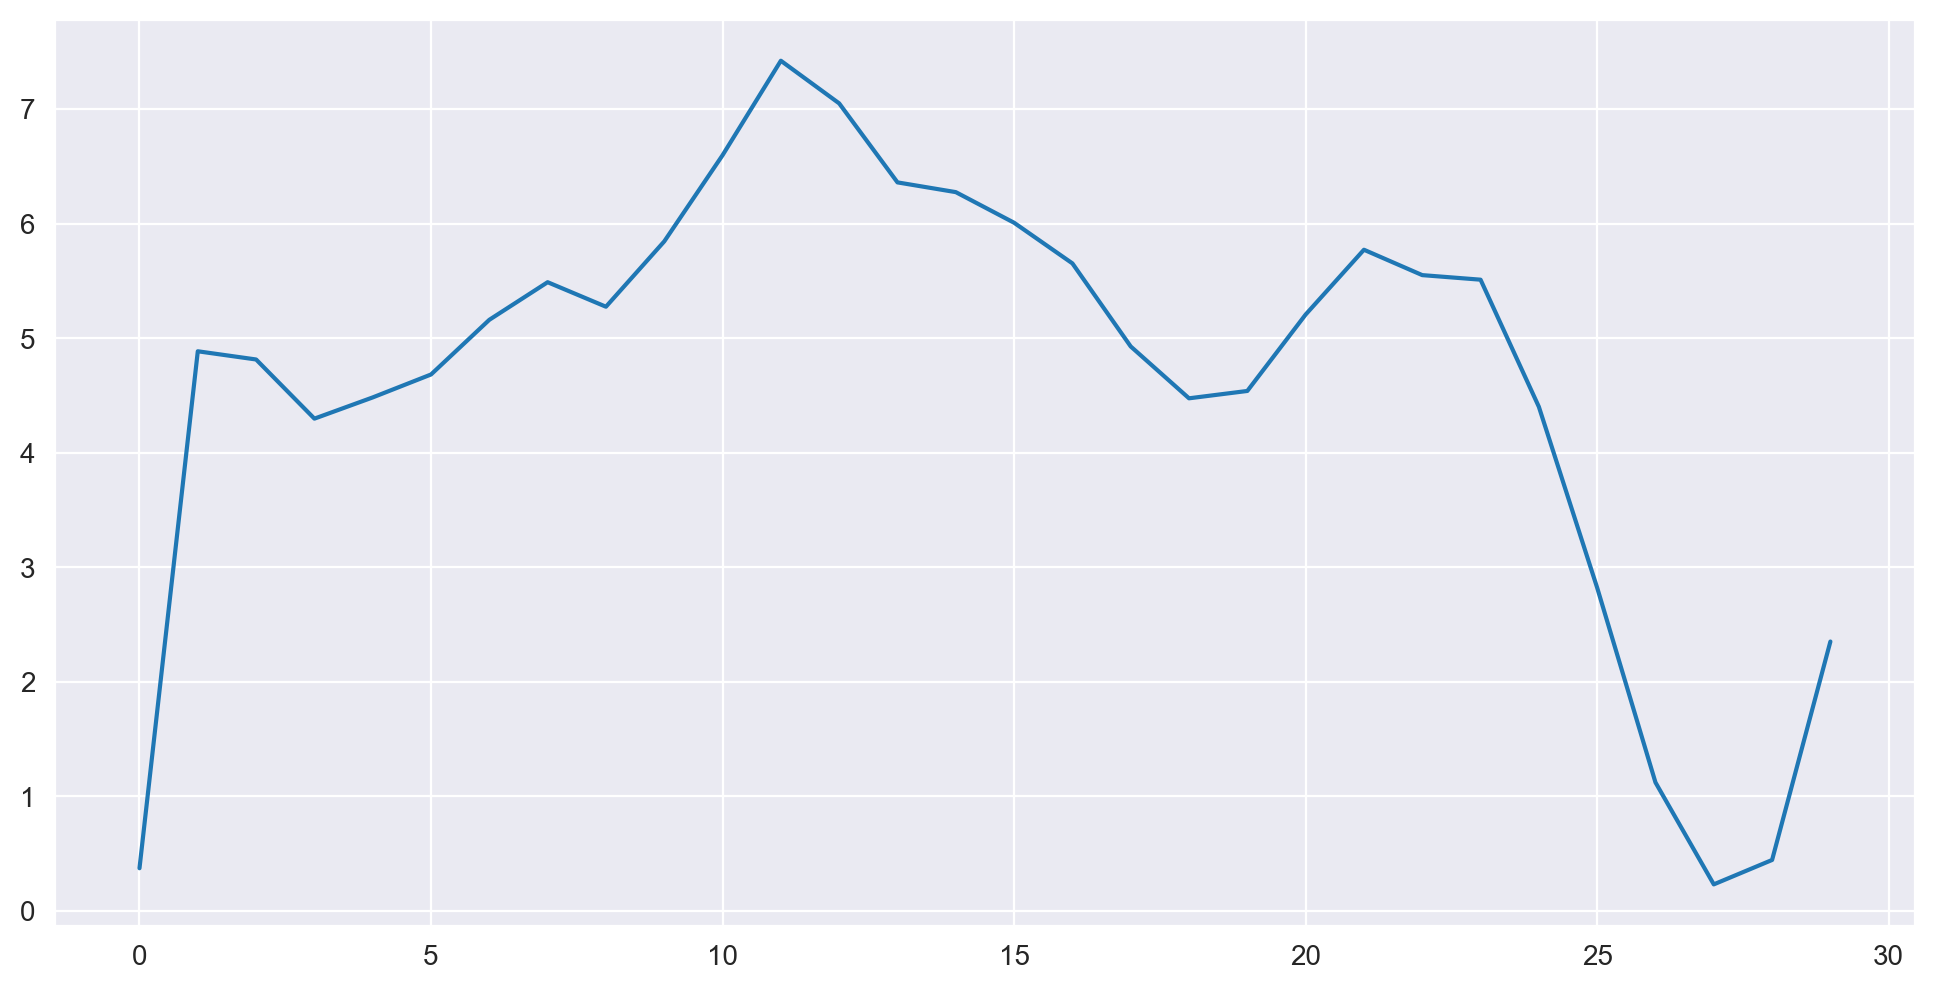

In [55]:
import seaborn as sns

plt.figure(figsize=(12, 6), dpi=200)
plt.plot(range(len(values)), values)


4.441546228755156
9.02632245617504
10.18751885188413
11.689873225809569
11.388459940769863
11.083673328393203
11.648582796334814
9.756037246954953
8.9959717338481
12.81602715148026
15.229086435873263
13.794027823853888
14.089774890097633
15.21300523689247
19.33788143631736
22.454933654369263
22.65998413099374
23.74153149589864
24.526999886768934
23.33683087098078
20.42497444376622
18.604350957462934
18.573394467858414
20.419482351890892
20.515048827643376
20.710926535895652
21.58096089354914
19.820844775814507
16.46256371564744
13.458524805052235


In [57]:
values.index(max(values))

11

In [ ]:
market_analysis.adr_analysis()
market_analysis.sefi()

,High,Low,Open,Close,Volume,Adj_Close,Change,SEFI,SEFI Signal,ADR,...,STOCH_K,STOCH_D,Volume_Change,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,ADR_signal,Cloud
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-18,3921.979980,3885.030029,3915.860107,3913.969971,4773430000,3913.969971,-0.441584,32.868526,False,0.640523,...,85.775043,90.454305,0.011689,3912.679932,3822.275024,3737.372437,3530.314941,3974.540039,False,False
2021-02-19,3930.409912,3903.070068,3921.159912,3906.709961,4823940000,3906.709961,-0.185490,33.864542,False,1.379147,...,80.552464,86.291882,0.010581,3917.684937,3822.275024,3737.372437,3530.314941,3971.090088,False,False
2021-02-22,3902.919922,3874.709961,3885.550049,3876.500000,5870190000,3876.500000,-0.773284,39.043825,False,0.945736,...,53.382934,73.236814,0.216887,3912.569946,3822.275024,3737.372437,3530.314941,3958.550049,False,False
2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117,0.125632,40.836653,False,1.136170,...,52.319878,62.085092,0.069923,3878.010010,3822.275024,3737.372437,3530.314941,3972.889893,False,False
2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932,1.135161,34.661355,False,3.183333,...,82.739556,62.814123,-0.053864,3878.010010,3822.275024,3745.462463,3553.214966,4019.870117,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,4472.770020,4429.279785,4429.279785,4471.069824,3363200000,4471.069824,1.576672,47.117296,False,3.883495,...,58.976327,45.904651,-0.029707,4477.434814,4485.725098,4698.775146,4656.870117,4520.160156,False,False
2022-02-16,4489.549805,4429.680176,4455.750000,4475.009766,3478750000,4475.009766,0.088121,45.924453,False,1.502488,...,60.277281,51.771447,0.034357,4477.434814,4485.725098,4678.650146,4656.870117,4543.060059,False,False
2022-02-17,4456.060059,4373.810059,4456.060059,4380.259766,3596510000,4380.259766,-2.117314,61.033797,False,0.167053,...,6.690635,41.981414,0.033851,4477.434814,4485.725098,4687.645142,4656.870117,4575.520020,False,False


In [50]:
def get_cloud(sp500):
    iterations = 0
    cloud = np.full(len(sp500), False)
    for i, date in enumerate(sp500.index):
        if sp500.iloc[i]['SEFI Signal'] == True or sp500.iloc[i]['ADR_signal'] == True:
            cloud[i:i + 5] = True
            i += 5

    return cloud


market_analysis.sp500['Cloud'] = get_cloud(market_analysis.sp500)
market_entries = market_analysis.sp500[market_analysis.sp500['Cloud'] == True]

tickers = sp500_database.tickers
buys_counter = 0
returns = []
for ticker in tickers:
    df = sp500_database.query_ticker_data(ticker)
    df = EnhancedDataframe.populate_dataframe(df)
    if len(df) == 0:
        print(ticker, " is an empty data frame")
        continue
    df['Ichimoku_Entry'] = np.vectorize(ichimoku_entry)(df['senkou_span_a'], df['senkou_span_b'], df['RSI'])

    df.index = df['Date']
    df.drop(["Date", "test"], axis=1, inplace=True)
    for date in market_entries.index:
        if not date in df.index:
            continue

        if df.loc[date]['Ichimoku_Entry'] == True:
            buys_counter += 1
            date_index = df.index.get_loc(date)
            if date_index + 14 >= len(df) - 1:
                returns.append((df.iloc[-1]['Close'] - df.loc[date]['Close']) / df.iloc[-1]['Close'] * 100)
            else:
                print("Entry is Too close to df end")

256
CEG  is an empty data frame
OGN  is an empty data frame


0

In [34]:
# market_analysis.sp500['Cloud'] = get_cloud(market_analysis.sp500)

ValueError: Length of values (360) does not match length of index (256)

256


In [49]:
m

,High,Low,Open,Close,Volume,Adj_Close,Change,SEFI,SEFI Signal,ADR,...,STOCH_K,STOCH_D,Volume_Change,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,ADR_signal,Cloud
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-18,3921.979980,3885.030029,3915.860107,3913.969971,4773430000,3913.969971,-0.441584,32.868526,False,0.640523,...,85.775043,90.454305,0.011689,3912.679932,3822.275024,3737.372437,3530.314941,3974.540039,False,False
2021-02-19,3930.409912,3903.070068,3921.159912,3906.709961,4823940000,3906.709961,-0.185490,33.864542,False,1.379147,...,80.552464,86.291882,0.010581,3917.684937,3822.275024,3737.372437,3530.314941,3971.090088,False,False
2021-02-22,3902.919922,3874.709961,3885.550049,3876.500000,5870190000,3876.500000,-0.773284,39.043825,False,0.945736,...,53.382934,73.236814,0.216887,3912.569946,3822.275024,3737.372437,3530.314941,3958.550049,False,False
2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117,0.125632,40.836653,False,1.136170,...,52.319878,62.085092,0.069923,3878.010010,3822.275024,3737.372437,3530.314941,3972.889893,False,False
2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932,1.135161,34.661355,False,3.183333,...,82.739556,62.814123,-0.053864,3878.010010,3822.275024,3745.462463,3553.214966,4019.870117,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,4472.770020,4429.279785,4429.279785,4471.069824,3363200000,4471.069824,1.576672,47.117296,False,3.883495,...,58.976327,45.904651,-0.029707,4477.434814,4485.725098,4698.775146,4656.870117,4520.160156,False,False
2022-02-16,4489.549805,4429.680176,4455.750000,4475.009766,3478750000,4475.009766,0.088121,45.924453,False,1.502488,...,60.277281,51.771447,0.034357,4477.434814,4485.725098,4678.650146,4656.870117,4543.060059,False,False
2022-02-17,4456.060059,4373.810059,4456.060059,4380.259766,3596510000,4380.259766,-2.117314,61.033797,False,0.167053,...,6.690635,41.981414,0.033851,4477.434814,4485.725098,4687.645142,4656.870117,4575.520020,False,False
